In [11]:
# ----------------------------------
# Air Pollution Analysis - Phase 1
# Notebook: 01_air_pollution_analysis.ipynb
# ----------------------------------

In [12]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Make plots look nicer

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [14]:
# 2. Load Dataset

df = pd.read_csv("D:\AI-ML\Project\Air Polution Analyzer Database\global air pollution dataset.csv")   # dtatbase Path to read the csv file in form of csv
print("Initial Shape:", df.shape)      # Checks the shape and size of the dataset 
df.head()              # Shows only first 5 rows 

Initial Shape: (23463, 12)


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [15]:
# 3. Inspect dataset
# ========================================

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())         # prints columns
print("\nFirst 5 Rows:\n", df.head())

print("\nMissing Values:\n", df.isnull().sum())   #Counts null/missing values per column
print("\nData Types:\n", df.dtypes)

Dataset Shape: (23463, 12)

Columns: ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category']

First 5 Rows:
               Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39       

In [18]:
# ========================================
# 4. Data Cleaning
# ========================================

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert numeric columns (they are currently "object" because AQI values are text)
numeric_cols = ["aqi_value", "co_aqi_value", "ozone_aqi_value", "no2_aqi_value", "pm2.5_aqi_value"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows where city or main AQI value is missing
df = df.dropna(subset=["city", "aqi_value"])

print("Shape after cleaning:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape after cleaning: (23462, 12)

Data Types:
 country               object
city                  object
aqi_value              int64
aqi_category          object
co_aqi_value           int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object



Summary Stats:
           aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
count  23462.000000  23462.000000     23462.000000   23462.000000   
mean      72.011039      1.368383        35.193163       3.063294   
std       56.056409      1.832101        28.099198       5.254217   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       pm2.5_aqi_value  
count     23462.000000  
mean         68.519777  
std          54.797611  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  

Top Polluted Cities:
 city
Nagaur          500.0
Julana          500.0
Hodal           500.0
Chhachhrauli    500.0
Aonla           500.

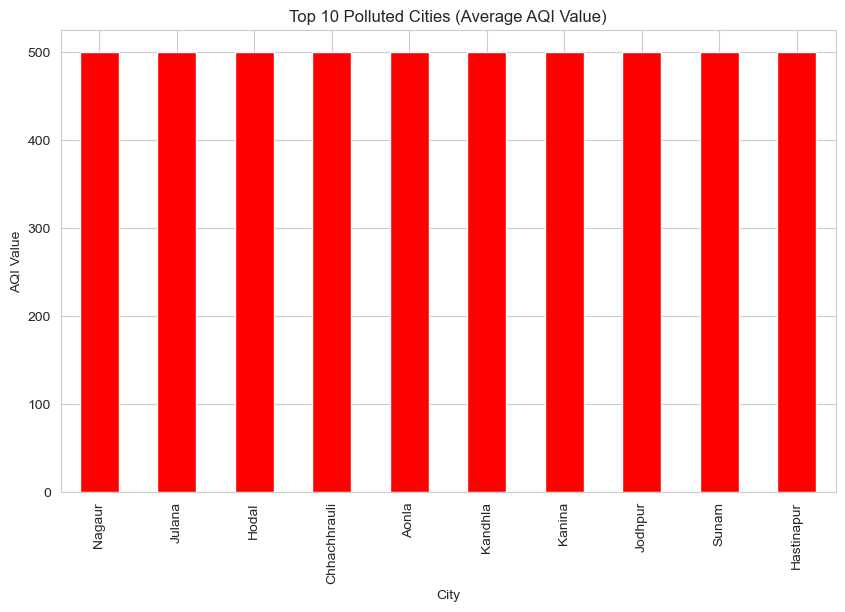

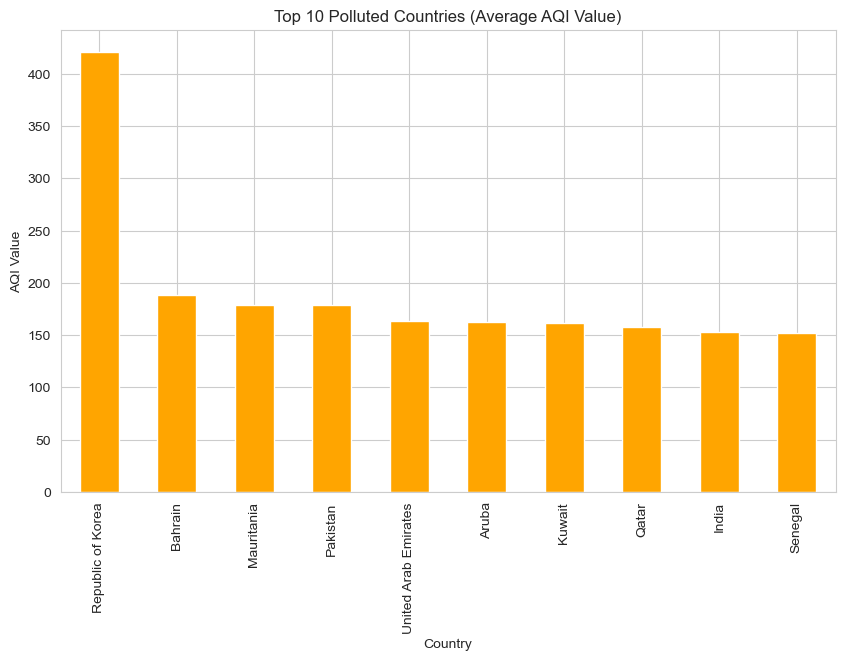

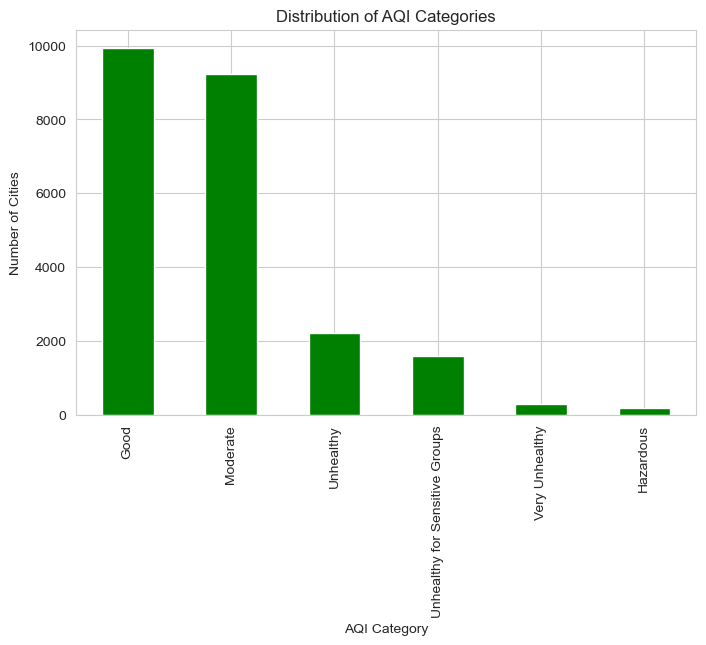

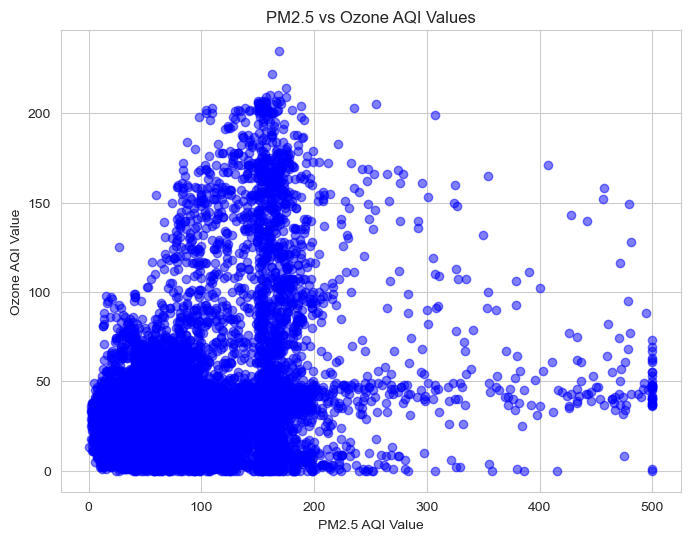

In [20]:
# ========================================
# 5. Exploratory Data Analysis (EDA)
# ========================================

# Summary
print("\nSummary Stats:\n", df.describe())

# Top 10 polluted cities (average AQI Value)
top_cities = df.groupby("city")["aqi_value"].mean().sort_values(ascending=False).head(10)
print("\nTop Polluted Cities:\n", top_cities)

# Visualization


plt.figure(figsize=(10,6))
top_cities.plot(kind="bar", color="red")
plt.title("Top 10 Polluted Cities (Average AQI Value)")
plt.xlabel("City")
plt.ylabel("AQI Value")
plt.show()

# Country-level average AQI
top_countries = df.groupby("country")["aqi_value"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind="bar", color="orange")
plt.title("Top 10 Polluted Countries (Average AQI Value)")
plt.xlabel("Country")
plt.ylabel("AQI Value")
plt.show()

# Distribution of AQI Categories
category_counts = df["aqi_category"].value_counts()

plt.figure(figsize=(8,5))
category_counts.plot(kind="bar", color="green")
plt.title("Distribution of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Number of Cities")
plt.show()

# Compare pollutants (scatter plot: PM2.5 vs Ozone)
plt.figure(figsize=(8,6))
plt.scatter(df["pm2.5_aqi_value"], df["ozone_aqi_value"], alpha=0.5, c="blue")
plt.title("PM2.5 vs Ozone AQI Values")
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("Ozone AQI Value")
plt.show()

In [21]:
# ========================================
# 6. Automated Insights (Textual Summary)
# ========================================

print("\n===== INSIGHTS =====\n")

# Top polluted city
most_polluted_city = top_cities.index[0]
most_polluted_value = top_cities.iloc[0]
print(f"🌆 The most polluted city in this dataset is **{most_polluted_city}** with an average AQI of {most_polluted_value:.1f}.")

# Top polluted country
most_polluted_country = top_countries.index[0]
most_polluted_country_value = top_countries.iloc[0]
print(f"🌍 The most polluted country (average across cities) is **{most_polluted_country}** with an AQI of {most_polluted_country_value:.1f}.")

# Best AQI city
cleanest_city = top_cities.index[-1]
cleanest_value = top_cities.iloc[-1]
print(f"✅ The cleanest city among the top set is **{cleanest_city}** with an AQI of {cleanest_value:.1f}.")

# AQI Category distribution
most_common_category = category_counts.idxmax()
most_common_count = category_counts.max()
print(f"📊 The most common AQI category is **{most_common_category}**, covering {most_common_count} cities.")

# Pollution correlation
pm_ozone_corr = df["pm2.5_aqi_value"].corr(df["ozone_aqi_value"])
print(f"🔗 Correlation between PM2.5 and Ozone AQI values is **{pm_ozone_corr:.2f}** "
      f"({'positive' if pm_ozone_corr > 0 else 'negative'}) — meaning higher PM2.5 is "
      f"{'often' if abs(pm_ozone_corr) > 0.3 else 'not strongly'} linked with higher Ozone levels.")

# High PM2.5 hotspots
pm25_hotspots = df[df["pm2.5_aqi_value"] > 100]["city"].unique()
if len(pm25_hotspots) > 0:
    print(f"⚠️ Cities with very high PM2.5 (>100 AQI) include: {', '.join(pm25_hotspots[:5])}...")
else:
    print("😊 No extreme PM2.5 hotspots (above 100 AQI) found in this dataset.")



===== INSIGHTS =====

🌆 The most polluted city in this dataset is **Nagaur** with an average AQI of 500.0.
🌍 The most polluted country (average across cities) is **Republic of Korea** with an AQI of 421.0.
✅ The cleanest city among the top set is **Hastinapur** with an AQI of 500.0.
📊 The most common AQI category is **Good**, covering 9936 cities.
🔗 Correlation between PM2.5 and Ozone AQI values is **0.34** (positive) — meaning higher PM2.5 is often linked with higher Ozone levels.
⚠️ Cities with very high PM2.5 (>100 AQI) include: Qalyub, Radaur, Radhan, Rajgir, Phulabani...


In [23]:
# ========================================
# 7. Export Results (Plots + Insights)
# ========================================
import os

# Create a folder for report outputs
report_dir = "air_quality_report"
os.makedirs(report_dir, exist_ok=True)

# Save plots
plt.figure(figsize=(10,5))
top_cities.plot(kind="bar", color="salmon")
plt.title("Top 10 Polluted Cities (by AQI)")
plt.ylabel("Average AQI")
plt.xlabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{report_dir}/top_cities.png")
plt.close()

plt.figure(figsize=(10,5))
top_countries.plot(kind="bar", color="skyblue")
plt.title("Top 10 Polluted Countries (by AQI)")
plt.ylabel("Average AQI")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{report_dir}/top_countries.png")
plt.close()

plt.figure(figsize=(6,6))
category_counts.plot(kind="pie", autopct='%1.1f%%', colors=["green","yellow","orange","red","purple","maroon"])
plt.ylabel("")
plt.title("Air Quality Category Distribution")
plt.tight_layout()
plt.savefig(f"{report_dir}/aqi_distribution.png")
plt.close()

# Save insights to Markdown
insight_lines = []

insight_lines.append("## Air Quality Insights\n")

# Top polluted city
insight_lines.append(f"- 🌆 The most polluted city is **{most_polluted_city}** with an average AQI of {most_polluted_value:.1f}.")
# Top polluted country
insight_lines.append(f"- 🌍 The most polluted country is **{most_polluted_country}** with an AQI of {most_polluted_country_value:.1f}.")
# Cleanest city
insight_lines.append(f"- ✅ The cleanest city is **{cleanest_city}** with an AQI of {cleanest_value:.1f}.")
# AQI category
insight_lines.append(f"- 📊 The most common AQI category is **{most_common_category}**, covering {most_common_count} cities.")
# Correlation
insight_lines.append(f"- 🔗 Correlation between PM2.5 and Ozone AQI is **{pm_ozone_corr:.2f}** "
                     f"({'positive' if pm_ozone_corr > 0 else 'negative'}).")
# PM2.5 hotspots
if len(pm25_hotspots) > 0:
    insight_lines.append(f"- ⚠️ High PM2.5 cities (>100 AQI): {', '.join(pm25_hotspots[:5])}...")
else:
    insight_lines.append("- 😊 No extreme PM2.5 hotspots (>100 AQI) found.")

# Write to file
with open(f"{report_dir}/insights.md", "w", encoding="utf-8") as f:
    f.write("\n".join(insight_lines))

print(f"✅ Report generated! Check the '{report_dir}' folder for plots and insights.")


✅ Report generated! Check the 'air_quality_report' folder for plots and insights.


In [24]:
# Check missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with all NaN
df = df.dropna(how="all")

# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Convert date column to datetime (if available)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

print("\nData types after cleaning:")
print(df.dtypes)


Missing values before cleaning:
country               427
city                    0
aqi_value               0
aqi_category            0
co_aqi_value            0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

Data types after cleaning:
country               object
city                  object
aqi_value              int64
aqi_category          object
co_aqi_value           int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object


In [25]:
# Extract time-based features
if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

    # Create season feature (simple mapping for India/Northern Hemisphere)
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Summer'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else:
            return 'Autumn'

    df['season'] = df['month'].apply(get_season)

print(df.head())


              country              city  aqi_value aqi_category  co_aqi_value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  co_aqi_category  ozone_aqi_value ozone_aqi_category  no2_aqi_value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0             Good     

In [33]:
# Rolling average (if time series available)
if 'date' in df.columns:
    df = df.sort_values(by='date')

    if 'AQI' in df.columns:
        df['AQI_7day_avg'] = df['AQI'].rolling(window=7, min_periods=1).mean()

        # Plot AQI vs 7-day rolling average
        plt.figure(figsize=(10,5))
        plt.plot(df['date'], df['AQI'], label='Daily AQI', alpha=0.5)
        plt.plot(df['date'], df['AQI_7day_avg'], label='7-day Avg AQI', color='red')
        plt.xlabel("Date")
        plt.ylabel("AQI")
        plt.title("Daily AQI vs 7-day Rolling Average")
        plt.legend()
        plt.show()


In [36]:
# --- Data Cleaning ---
# Find AQI-related columns automatically
possible_cols = ["AQI", "AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]

# Keep only the ones actually present in the dataframe
cols_to_numeric = [col for col in possible_cols if col in df.columns]

print("Converting these columns to numeric:", cols_to_numeric)

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values → fill with column median
df[cols_to_numeric] = df[cols_to_numeric].fillna(df[cols_to_numeric].median())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

print("✅ Cleaning done.")
print("Dataset shape after cleaning:", df.shape)
print("Any missing left?\n", df.isna().sum())


Converting these columns to numeric: []
✅ Cleaning done.
Dataset shape after cleaning: (23462, 12)
Any missing left?
 country               427
city                    0
aqi_value               0
aqi_category            0
co_aqi_value            0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64


In [30]:
# --- Export cleaned dataset for frontend usage ---
cleaned_file = "cleaned_air_quality_data.csv"
df.to_csv(cleaned_file, index=False)

print(f"✅ Cleaned dataset exported to {cleaned_file}")


✅ Cleaned dataset exported to cleaned_air_quality_data.csv


In [32]:
# --- Final Project Summary (Safe Version) ---
print("📊 Final Dataset Summary\n")
print(f"Total Records: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

# Safely check unique values only if column exists
for col in ["Country", "City"]:
    if col in df.columns:
        print(f"Unique {col}s: {df[col].nunique()}")
    else:
        print(f"⚠️ Column '{col}' not found in dataset.")

# AQI Range (only if column exists)
if "AQI Value" in df.columns:
    print(f"AQI Range: {df['AQI Value'].min()} - {df['AQI Value'].max()}")
else:
    print("⚠️ AQI Value column not found.")

# Check if new features exist
features = ['Year', 'Month', 'Season']
for f in features:
    print(f"{f} column exists? {'✅ Yes' if f in df.columns else '❌ No'}")


📊 Final Dataset Summary

Total Records: 23462
Total Columns: 12
⚠️ Column 'Country' not found in dataset.
⚠️ Column 'City' not found in dataset.
⚠️ AQI Value column not found.
Year column exists? ❌ No
Month column exists? ❌ No
Season column exists? ❌ No


In [37]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
